Monte Carlo Ant System

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from math import hypot

Parameter setting

In [102]:
n=100
m=100
numberOfIterations=10
ro=0.5
alpha=1
beta=5

Initial Trail

In [103]:
tau=np.ones((n,n))*0.001

City generation

In [104]:
np.random.seed(2)
xy=np.random.rand(2,n)
#x=[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
#y=[0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
x=xy[0]
y=xy[1]

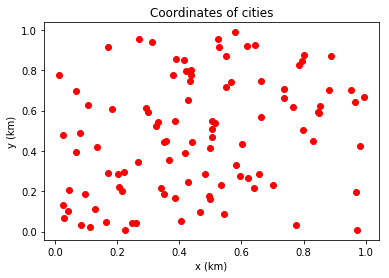

In [105]:
plt.plot(x,y,'ro')
plt.title('Coordinates of cities')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.show()

Distance measurement

In [106]:
d=np.zeros((n,n))
from math import hypot
for i in range(0,n):
    for j in range(0,n):
        d[i,j] = hypot(x[i]-x[j], y[i]-y[j])

Heuristic information

In [107]:
h=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        if d[i,j]==0:
            h[i,j]=0;
        else:
            h[i,j]=1/d[i,j];

In [108]:
from random import randint
road=np.ones((m,n))*(-10)
deltaTau=np.zeros((n,n))
#iteration 
for i in range(0,numberOfIterations):
    road=np.ones((m,n))*(-10)
    deltaTau=np.zeros((n,n))
    #initializes start places
    for j in range(0,m):
        road[j,0]=int(randint(0, (n-1)))
        #road[j,0]=j 
    for visit in range(0,(n-1)):
        for ant in range(0,m):
            destination=-1;
            pMax=0;
            sumC=0;
            for c in range(0,n):       
                if c not in road[ant,:]:
                    sumC=sumC+((tau[int(road[ant,visit]),c]**alpha)*(h[int(road[ant,visit]),c]**beta))       
            for city in range(0,n):
                if city not in road[ant,:]:
                    p=(tau[int(road[ant,visit]),city]*h[int(road[ant,visit]),city])/sumC           
                    if (p>=pMax):
                        pMax=p
                        destination=city
            road[ant,visit+1]=destination  
    #calculates tour length
    tourLength=np.zeros(m)
    for mm in range(0,m):
        for cc in range(0,(n-1)):
            tourLength[mm]=tourLength[mm]+d[int(road[mm,cc]),int(road[mm,cc+1])]
        tourLength[mm]=tourLength[mm]+d[int(road[mm,cc+1]),int(road[mm,0])]
    print("Iteration=%d" % i)
    print("The avg tour length=%f" % (np.sum(tourLength)/m))  
    print("The shortest tour length=%f" % np.min(tourLength))
    #calculates sum of deltatau
    for ii in range(0,m):
        for jj in range(0,(n-1)):
            deltaTau[int(road[ii,jj]),int(road[ii,jj+1])]=deltaTau[int(road[ii,jj]),int(road[ii,jj+1])]+(1/tourLength[ii])
            deltaTau[int(road[ii,jj+1]),int(road[ii,jj])]=deltaTau[int(road[ii,jj]),int(road[ii,jj+1])]
        deltaTau[int(road[ii,jj+1]),int(road[ii,0])]=deltaTau[int(road[ii,jj+1]),int(road[ii,0])]+(1/tourLength[ii])
        deltaTau[int(road[ii,0]),int(road[ii,jj+1])]=deltaTau[int(road[ii,jj+1]),int(road[ii,0])]
    for iii in range(0,n):
        for jjj in range(0,n): 
            tau[iii,jjj]=(1-ro)*tau[iii,jjj]+deltaTau[iii,jjj]           

Iteration=0
The avg tour length=9.184247
The shortest tour length=8.216267
Iteration=1
The avg tour length=9.016235
The shortest tour length=8.458068
Iteration=2
The avg tour length=9.181355
The shortest tour length=8.323632
Iteration=3
The avg tour length=9.301714
The shortest tour length=8.356200
Iteration=4
The avg tour length=9.092183
The shortest tour length=8.314795
Iteration=5
The avg tour length=9.154188
The shortest tour length=8.326197
Iteration=6
The avg tour length=9.038987
The shortest tour length=8.326197
Iteration=7
The avg tour length=9.144633
The shortest tour length=8.326197
Iteration=8
The avg tour length=9.006316
The shortest tour length=8.449414
Iteration=9
The avg tour length=9.114927
The shortest tour length=8.366906
